In [32]:
'''
Created: Trent Nguyen just.trent.n@gmail.com

Data analyst on crimes in Orlando city limit.  Data obtained from Orlando Police Department.
'''
import gmaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !!! must have  google maps api key
gmaps.configure(api_key='')


In [3]:
# https://data.cityoforlando.net/Orlando-Police/OPD-Crimes/4y9m-jbmz

# This dataset comes from the Orlando Police Department records management system. 
# It includes all Part 1 and Part 2 crimes as defined by the FBI’s Uniform Crime Reporting standards. 
# When multiple crimes are committed the highest level of crime is what is shown. 
# The data includes only Open and Closed cases and does not include informational cases without arrests.
# This data excludes crimes where the victim or offender data is or could be legally protected. 
# Those include:

# Domestic Violence
# Elderly Abuse
# Exempt from Public Record
# Witness Protection
# Cases where the offender was charged with the following case codes/state statutes:
# Sexual Battery
# Child Abuse
# Aggravated Stalking/Harassment
# Obscene or harassing telephone calls
# Aggravated Battery
# Domestic Violence Injunctions
# Lewd,Lascivious or Indecent Assault upon or in the presence of a child
# Elder Abuse
# Baker Act
# Obscenity
# Forcible Rape
# Forcible Sodomy
# Forcible Fondling
# Cases where the a juvenile is arrested 

data_orig = pd.read_csv('OPD_Crimes.csv')

In [4]:
data_orig.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2013-00074238,02/19/2013 12:41:00 PM,200 Block of N TAMPA AVE,Commercial/Office Building,Assault,Simple assault,Committed,Closed,Mapped,"(28.54518403, -81.40556136)"
1,2014-00326276,08/06/2014 02:55:00 AM,8600 Block of ANDREAS AVE,Construction Site,Theft,All other larceny,Committed,Closed,Mapped,"(28.44153996, -81.23261223)"
2,2014-00451565,10/30/2014 10:15:00 PM,1900 Block of METROCENTER BV,Commercial/Office Building,Theft,All other larceny,Committed,Closed,Mapped,"(28.51884164, -81.46848512)"
3,2016-00007509,01/06/2016 10:39:00 AM,1500 Block of AARON AVE,School,Assault,Simple assault,Committed,Closed,Mapped,"(28.52377872, -81.43230433)"
4,2011-00442271,10/06/2011 06:55:00 AM,W JACKSON ST / S PARRAMORE AVE,Parking Lot - Surface,Assault,Simple assault,Attempted,Arrest,Mapped,"(28.53921282, -81.38900691)"


In [5]:
data_orig.describe()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
count,181260,181258,181260,181260,181260,181260,181260,181260,181260,174368
unique,181259,176574,13249,78,13,25,3,5,3,14131
top,CaseNumber,05/28/2016 11:10:00 AM,4900 Block of INTERNATIONAL DR,Apartment/Condo,Theft,All other larceny,Committed,Closed,Mapped,"(28.43180352, -81.30852827)"
freq,2,4,3596,34446,89766,47189,171626,129792,174368,3736


## Data Cleaning

In [6]:
# copy original data frame so cleaning can be done
data1 = data_orig.copy()

In [7]:
# convert str 'Case Date Time' to Timestamp type
# list comprehension but still slow; over 2 minutes, 
# wonder if there's faster ways to convert to Timestamp
#data1['Case Date Time'] = pd.to_datetime(data1['Case Date Time'])
data1['Case Date Time'] = [pd.to_datetime(x) for x in data1['Case Date Time']]
data1.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2013-00074238,2013-02-19 12:41:00,200 Block of N TAMPA AVE,Commercial/Office Building,Assault,Simple assault,Committed,Closed,Mapped,"(28.54518403, -81.40556136)"
1,2014-00326276,2014-08-06 02:55:00,8600 Block of ANDREAS AVE,Construction Site,Theft,All other larceny,Committed,Closed,Mapped,"(28.44153996, -81.23261223)"
2,2014-00451565,2014-10-30 22:15:00,1900 Block of METROCENTER BV,Commercial/Office Building,Theft,All other larceny,Committed,Closed,Mapped,"(28.51884164, -81.46848512)"
3,2016-00007509,2016-01-06 10:39:00,1500 Block of AARON AVE,School,Assault,Simple assault,Committed,Closed,Mapped,"(28.52377872, -81.43230433)"
4,2011-00442271,2011-10-06 06:55:00,W JACKSON ST / S PARRAMORE AVE,Parking Lot - Surface,Assault,Simple assault,Attempted,Arrest,Mapped,"(28.53921282, -81.38900691)"


In [8]:
# remove parenthensis '()' from Location str
data1['Location'].replace('[\(\)]','', regex=True, inplace=True)

data1.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2013-00074238,2013-02-19 12:41:00,200 Block of N TAMPA AVE,Commercial/Office Building,Assault,Simple assault,Committed,Closed,Mapped,"28.54518403, -81.40556136"
1,2014-00326276,2014-08-06 02:55:00,8600 Block of ANDREAS AVE,Construction Site,Theft,All other larceny,Committed,Closed,Mapped,"28.44153996, -81.23261223"
2,2014-00451565,2014-10-30 22:15:00,1900 Block of METROCENTER BV,Commercial/Office Building,Theft,All other larceny,Committed,Closed,Mapped,"28.51884164, -81.46848512"
3,2016-00007509,2016-01-06 10:39:00,1500 Block of AARON AVE,School,Assault,Simple assault,Committed,Closed,Mapped,"28.52377872, -81.43230433"
4,2011-00442271,2011-10-06 06:55:00,W JACKSON ST / S PARRAMORE AVE,Parking Lot - Surface,Assault,Simple assault,Attempted,Arrest,Mapped,"28.53921282, -81.38900691"


In [9]:
# drop any rows that contains NaN; mostly in the Location column
data1.dropna(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174368 entries, 0 to 181259
Data columns (total 10 columns):
Case Number                   174368 non-null object
Case Date Time                174368 non-null datetime64[ns]
Case Location                 174368 non-null object
Case Offense Location Type    174368 non-null object
Case Offense Category         174368 non-null object
Case Offense Type             174368 non-null object
Case Offense Charge Type      174368 non-null object
Case Disposition              174368 non-null object
Status                        174368 non-null object
Location                      174368 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 14.6+ MB


In [10]:
# convert the str 'Location' coordinate to float64
location =[ (np.float64(lat), np.float64(long)) for (lat, long) in data1['Location'].str.split(',')]
data1['Location'] = location
data1.head()


,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2013-00074238,2013-02-19 12:41:00,200 Block of N TAMPA AVE,Commercial/Office Building,Assault,Simple assault,Committed,Closed,Mapped,"(28.54518403, -81.40556136)"
1,2014-00326276,2014-08-06 02:55:00,8600 Block of ANDREAS AVE,Construction Site,Theft,All other larceny,Committed,Closed,Mapped,"(28.44153996, -81.23261223)"
2,2014-00451565,2014-10-30 22:15:00,1900 Block of METROCENTER BV,Commercial/Office Building,Theft,All other larceny,Committed,Closed,Mapped,"(28.51884164, -81.46848512)"
3,2016-00007509,2016-01-06 10:39:00,1500 Block of AARON AVE,School,Assault,Simple assault,Committed,Closed,Mapped,"(28.52377872, -81.43230433)"
4,2011-00442271,2011-10-06 06:55:00,W JACKSON ST / S PARRAMORE AVE,Parking Lot - Surface,Assault,Simple assault,Attempted,Arrest,Mapped,"(28.53921282, -81.38900691)"


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174368 entries, 0 to 181259
Data columns (total 10 columns):
Case Number                   174368 non-null object
Case Date Time                174368 non-null datetime64[ns]
Case Location                 174368 non-null object
Case Offense Location Type    174368 non-null object
Case Offense Category         174368 non-null object
Case Offense Type             174368 non-null object
Case Offense Charge Type      174368 non-null object
Case Disposition              174368 non-null object
Status                        174368 non-null object
Location                      174368 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 14.6+ MB


In [12]:
data1['Case Offense Category'].value_counts()

Theft            86706
Burglary         25129
Assault          19022
Narcotics        18299
Fraud            11255
Vehicle Theft     8627
Robbery           4828
Arson              236
Homicide           140
Kidnapping          87
Embezzlement        38
Bribery              1
Name: Case Offense Category, dtype: int64

### Get Data on Year 2017

In [13]:
# get data for yr 2017 for now
bYear2017 =  data1['Case Date Time'].dt.year == 2017

# checked the Location data for 'NaN' (null); 
# can't rely on 'Status' column as it might not be accurate
bLoc = data1['Location'].isnull() == False

# get data for yr 2017 and where location data is available
data2017 = data1[bYear2017 & bLoc]

In [14]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20882 entries, 18 to 181253
Data columns (total 10 columns):
Case Number                   20882 non-null object
Case Date Time                20882 non-null datetime64[ns]
Case Location                 20882 non-null object
Case Offense Location Type    20882 non-null object
Case Offense Category         20882 non-null object
Case Offense Type             20882 non-null object
Case Offense Charge Type      20882 non-null object
Case Disposition              20882 non-null object
Status                        20882 non-null object
Location                      20882 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 1.8+ MB


In [15]:
data2017.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
18,2017-00436166,2017-11-06 07:16:00,9300 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Closed,Mapped,"(28.431808841, -81.308531359)"
28,2017-00081583,2017-02-28 10:10:00,6100 Block of WESTGATE DR,Apartment/Condo,Theft,All other larceny,Attempted,Closed,Mapped,"(28.532106547, -81.467537572)"
36,2017-00314016,2017-08-11 22:43:00,500 Block of N JOHN YOUNG PKWY,Bus/Rail Terminal,Assault,Simple assault,Committed,Arrest,Mapped,"(28.548002548, -81.413740652)"
39,2017-00280881,2017-07-19 15:19:00,9200 Block of RANDAL PARK BLVD,Parking Lot - Surface,Theft,All other larceny,Committed,Closed,Mapped,"(28.43245109, -81.233032639)"
46,2017-00257909,2017-07-03 10:34:00,4300 Block of LAKE UNDERHILL RD,Parking Lot - Surface,Theft,All other larceny,Attempted,Closed,Mapped,"(28.537144516, -81.332768003)"


In [ ]:
 #test = data2017[:100]

In [16]:
data2017['Case Offense Category'].value_counts()

Theft            11568
Burglary          2342
Assault           2172
Narcotics         1638
Fraud             1301
Vehicle Theft     1237
Robbery            570
Homicide            22
Arson               20
Kidnapping           8
Embezzlement         4
Name: Case Offense Category, dtype: int64

In [ ]:
#txtCase = np.unique(test['Case Offense Category'].values)
# df ={}
# for x in txtCase:
#     bPick = test['Case Offense Category'].values == x
#     df[x] = test[bPick]
       

### Functions

In [17]:
def DatFrameCat(df: pd.DataFrame, col_name: str, values_nm: [str] ) -> pd.DataFrame:
    '''
    Return a data frame based on search of values name on a particular column.
    df: pass in data frame
    col_name: column name
    values_nm: values list use to search on column name
    '''    
    bSelect = df[col_name].isin(values_nm)
    ret = df[bSelect]
    
    return ret



In [18]:
def DrawHeatMap(layer_location) -> gmaps.figure:
    try:
        heatmap = gmaps.figure()
        heatlayer = gmaps.heatmap_layer(layer_location)
        heatmap.add_layer(heatlayer)
        return heatmap
    except:
        pass

#### Categorize crime types

In [19]:
# Larceny = 'Theft','Burglary','Robbery'
Larceny = DatFrameCat(data2017, 'Case Offense Category',['Theft', 'Burglary', 'Robbery'] )
Larceny['Case Offense Category'].value_counts()

Theft       11568
Burglary     2342
Robbery       570
Name: Case Offense Category, dtype: int64

In [20]:
# Assault
Assault = DatFrameCat(data2017, 'Case Offense Category',['Assault'])
Assault['Case Offense Category'].value_counts()


Assault    2172
Name: Case Offense Category, dtype: int64

In [21]:
# Narcotics
Narcotics = DatFrameCat(data2017, 'Case Offense Category',['Narcotics'])
Narcotics['Case Offense Category'].value_counts()


Narcotics    1638
Name: Case Offense Category, dtype: int64

In [22]:
# Fraud = 'Fraud', 'Embezzlement'
Frauds = DatFrameCat(data2017, 'Case Offense Category',['Fraud', 'Embezzlement', 'Bribery'])
Frauds['Case Offense Category'].value_counts()


Fraud           1301
Embezzlement       4
Name: Case Offense Category, dtype: int64

In [23]:
# Vehicle Theft
VThefts  = DatFrameCat(data2017, 'Case Offense Category',['Vehicle Theft'])
VThefts['Case Offense Category'].value_counts()


Vehicle Theft    1237
Name: Case Offense Category, dtype: int64

In [24]:
# Homicide
Homicide  = DatFrameCat(data2017, 'Case Offense Category',['Homicide'])
Homicide['Case Offense Category'].value_counts()



Homicide    22
Name: Case Offense Category, dtype: int64

In [25]:
# Arson
Arson  = DatFrameCat(data2017, 'Case Offense Category',['Arson'])
Arson['Case Offense Category'].value_counts()


Arson    20
Name: Case Offense Category, dtype: int64

In [26]:
# Kidnapping
Kidnapping  = DatFrameCat(data2017, 'Case Offense Category',['Kidnapping'])
Kidnapping['Case Offense Category'].value_counts()



Kidnapping    8
Name: Case Offense Category, dtype: int64

In [ ]:
# map1 = gmaps.figure()
# layer1 = gmaps.symbol_layer(Larceny['GPS-Location'], fill_color='#7FFF00', stroke_color='#7FFF00')
# layer2 = gmaps.symbol_layer(Assault['GPS-Location'], fill_color='#00FFFF', stroke_color='#00FFFF')
# layer3 = gmaps.symbol_layer(Narcotics['GPS-Location'], fill_color='#00008B', stroke_color='#00008B')
# layer4 = gmaps.symbol_layer(Fraud['GPS-Location'], fill_color='#006400', stroke_color='#006400')

# map1.add_layer(layer1)
# map1.add_layer(layer2)
# map1.add_layer(layer3)
# map1.add_layer(layer4)

# map1

## Heat Maps

### Orlando Crime:  All Crimes 2017

In [27]:
All2017heatmap = DrawHeatMap(data2017['Location'])
All2017heatmap

Figure(layout=FigureLayout(height='420px'))

### Orlando Crimes:  Larceny (Theft, Burglary, Robbery) 2017

In [ ]:
LarcenyMap = DrawHeatMap(Larceny['Location'])
LarcenyMap

### Orlando Crime: Assaults in 2017

In [28]:
AssaultMap = DrawHeatMap(Assault['Location'])
AssaultMap

Figure(layout=FigureLayout(height='420px'))

### Orlando Crime: Frauds in 2017

In [29]:
FMap = DrawHeatMap(Frauds['Location'])
FMap

Figure(layout=FigureLayout(height='420px'))

### Orlando Crime: Vehicle Theft in 2017

In [30]:
VTheftmap = DrawHeatMap(VThefts['Location'])
VTheftmap

Figure(layout=FigureLayout(height='420px'))

### Orlando Crime: Homicide in 2017

In [31]:
Hmap = DrawHeatMap(Homicide['Location'])
Hmap

Figure(layout=FigureLayout(height='420px'))

### Graphs

Text(0, 0.5, 'Crimes')

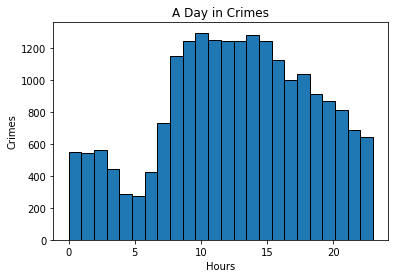

In [43]:
# Hours that were reported for the crimes, not actual hours when crimes were committed
plt.hist(data2017['Case Date Time'].dt.hour, edgecolor='black', bins=24)

plt.title('A Day in Crimes')
plt.xlabel('Hours')
plt.ylabel('Crimes')